# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data

In [2]:
stock_data = pd.read_csv('static/data/stock_data.csv', parse_dates=["Date"], index_col=['Date']).dropna()
benchmark_data = pd.read_csv('static/data/benchmark_data.csv', parse_dates=["Date"], index_col=['Date']).dropna()

# Inspect Daily Prices Data

### General dataframe information

In [3]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB


# Summarize Daily Pricing Data for Stocks

In [4]:
frames = [stock_data.describe(), benchmark_data.describe()]

In [5]:
stock_summary = pd.concat(frames, axis=1).round()
stock_summary

,Amazon,Facebook,S&P 500
count,252.0,252.0,252.0
mean,700.0,117.0,2095.0
std,92.0,9.0,101.0
min,482.0,94.0,1829.0
25%,607.0,112.0,2047.0
50%,728.0,118.0,2104.0
75%,768.0,124.0,2169.0
max,844.0,133.0,2272.0


<strong>Comment:</strong><font color="blue"> The mean price for Amazon is nearly 7x higher than Facebook</font>

# Visualize Daily Pricing Data

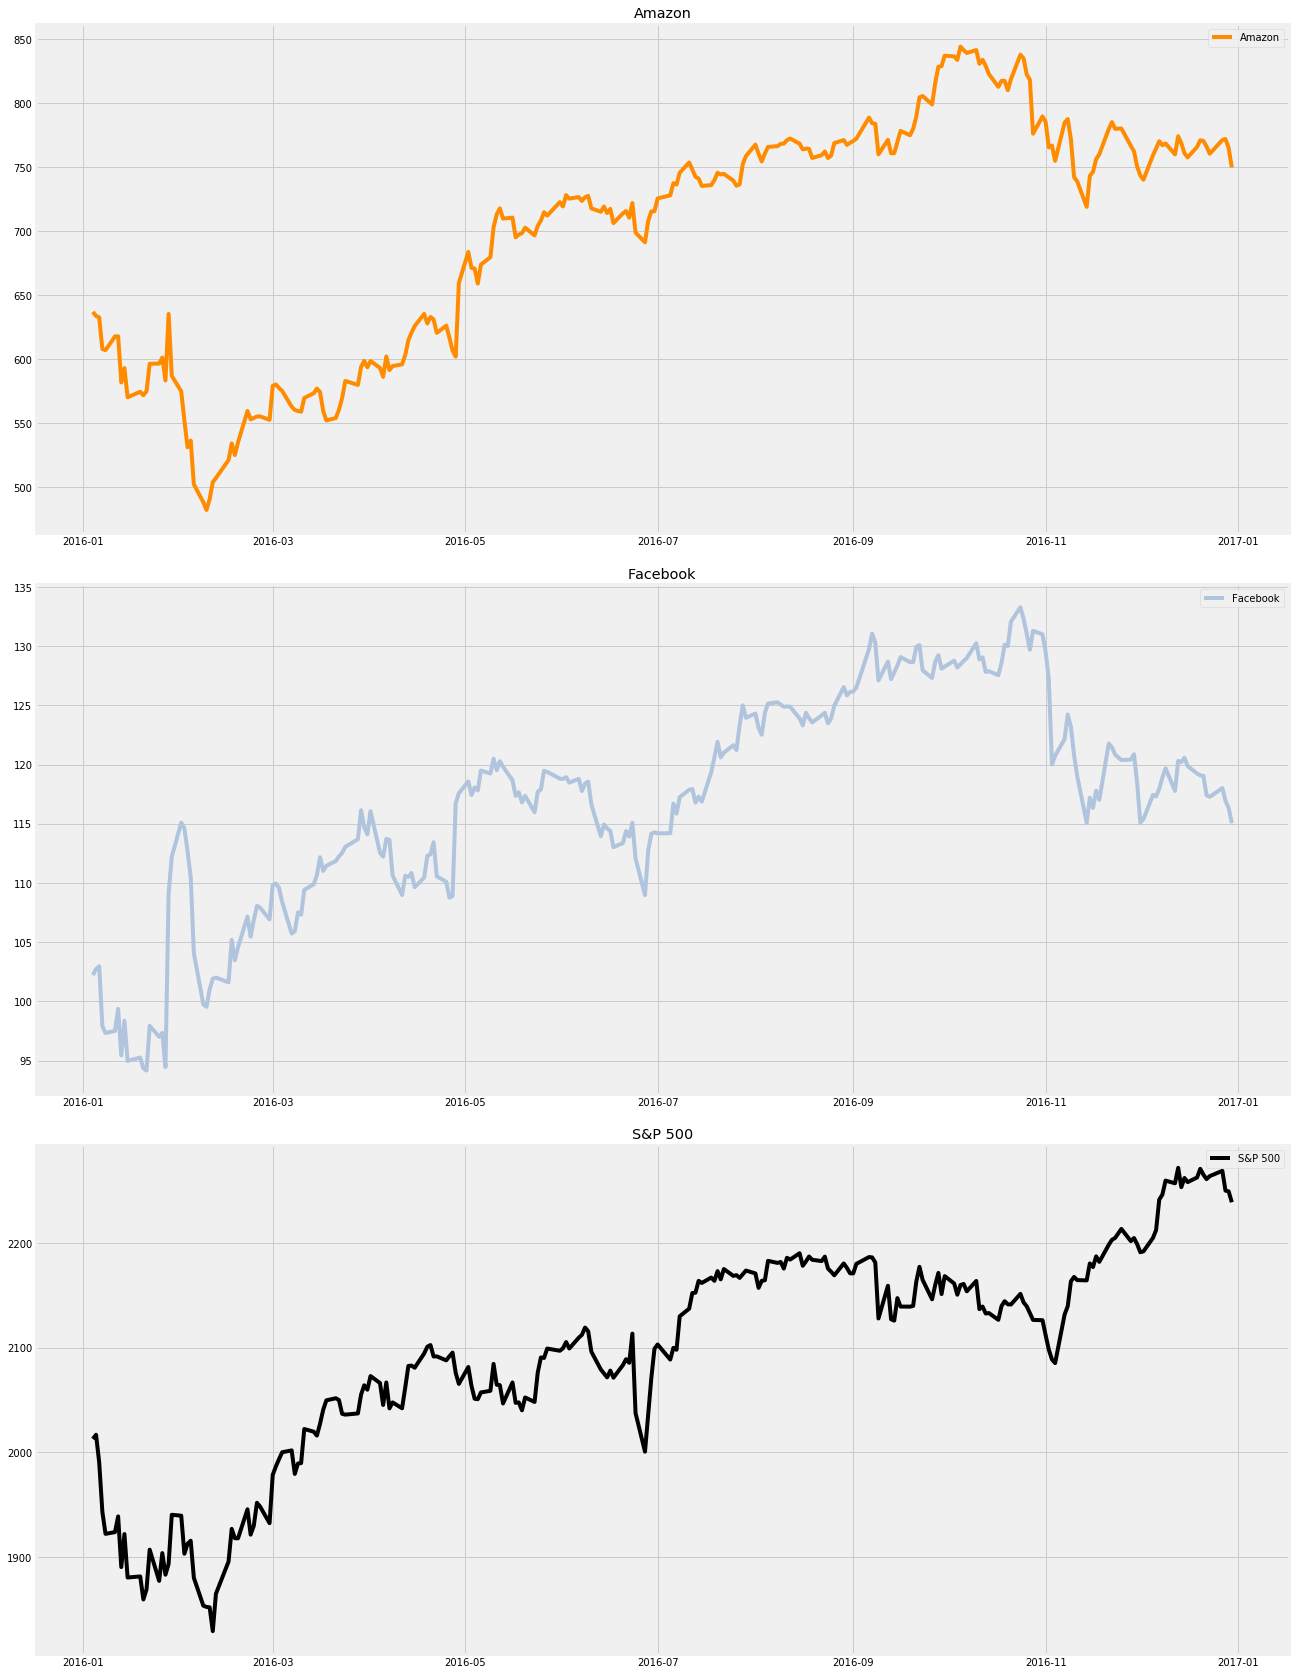

In [16]:
fig, axes = plt.subplots(3,1, figsize=(20,30), sharey=False)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# The first subplot (row 1, col 1)
axes[0].plot(stock_data['Amazon'], color='darkorange', label="Amazon")
axes[0].legend(loc="best")
axes[0].set_title("Amazon")

# The second subplot (ro2, col 1)
axes[1].plot(stock_data['Facebook'], color='lightsteelblue', label="Facebook")
axes[1].legend(loc="best")
axes[1].set_title("Facebook")

# The third subplot (ro3, col 1)
axes[2].plot(benchmark_data['S&P 500'], color='black', label="S&P 500")
axes[2].legend(loc="best")
axes[2].set_title("S&P 500")

plt.show()

<strong>Comment:</strong><font color="blue"> The daily prices for each investment is higher at the end of this reporting period than the initial price.</font>

# <strong><font color="blue">Compute the Sharpe Ratio inputs</font></strong>

# Step 1: <font color="red">Calculate the Daily Stock Returns</font>

In [7]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# Summarize the Daily Stock Returns

In [8]:
frames2 = [stock_returns.describe(), sp_returns.describe()]
returns_summary = pd.concat(frames2, axis=1).round(5)
returns_summary

,Amazon,Facebook,S&P 500
count,251.00000,251.00000,251.00000
mean,0.00082,0.00063,0.00046
std,0.01838,0.01784,0.00821
min,-0.07610,-0.05810,-0.03592
25%,-0.00721,-0.00722,-0.00295
50%,0.00086,0.00088,0.00021
75%,0.00922,0.00811,0.00450
max,0.09566,0.15521,0.02476


# Visualize the Daily Stock Returns

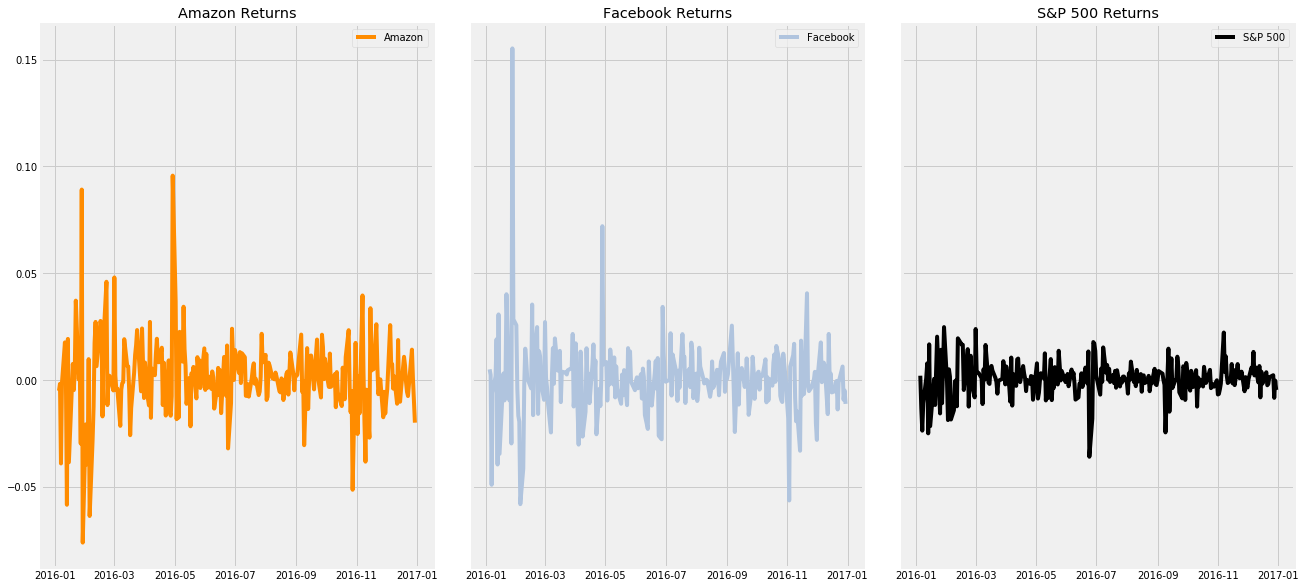

In [9]:
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# The first subplot (row 1, col 1)
axes[0].plot(stock_returns['Amazon'], color='darkorange', label="Amazon")
axes[0].legend(loc="best")
axes[0].set_title("Amazon Returns")

# The second subplot (ro1, col 2)
axes[1].plot(stock_returns['Facebook'], color='lightsteelblue', label="Facebook")
axes[1].legend(loc="best")
axes[1].set_title("Facebook Returns")

# The third subplot (ro1, col 3)
axes[2].plot(sp_returns, color='black', label="S&P 500")
axes[2].legend(loc="best")
axes[2].set_title("S&P 500 Returns")

plt.show()

<strong>Comment:</strong><font color="blue"> The daily mean return is higher for Amazon than Facebook.</font>

# Step 2: <font color="red">Calculate the "Excess Return", the relative performance of each stock compared to the S&P 500</font>

In [10]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# summarize the excess_returns
excess_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


<strong>Comment:</strong><font color="blue"> Amazon and Facebook stock seem to have similar mean excess return, which suggest similar relative performances.</font>

# Plot excess return

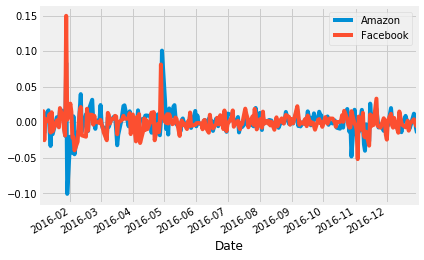

In [11]:
# plot the excess_returns
excess_returns.plot()
plt.show()

# Step 3:  <font color="red">Calculate the Average Difference in Daily Returns Stocks vs S&P 500</font>

In [12]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()
avg_excess_return

Amazon      0.000360
Facebook    0.000168
dtype: float64

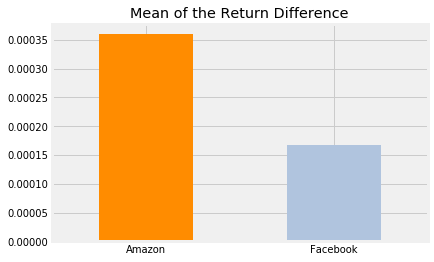

In [13]:
# plot avg_excess_returns
avg_excess_return.plot.bar(color=['DARKORANGE', "LIGHTSTEELBLUE"], title='Mean of the Return Difference', rot=0)
plt.show()

<strong>Comment:</strong><font color="blue"> Amazon's mean excess return is higher than Facebook excess return.</font>

# Step 4: <font color="red">Calculate the Standard Deviation of the Return Difference</font>

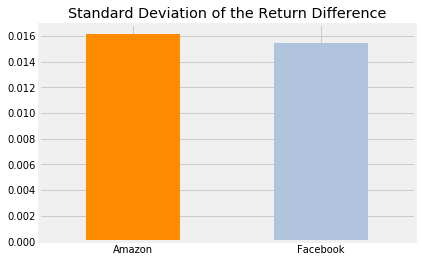

In [14]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(color=['DARKORANGE', "LIGHTSTEELBLUE"], title='Standard Deviation of the Return Difference', rot=0)
plt.show()

<strong>Comment:</strong><font color="blue"> Facebook appears to have a smaller standard devision of the return difference than Amazon.</font>

# Step 5: <font color="red">Calculate the Sharpe Ratio</font>

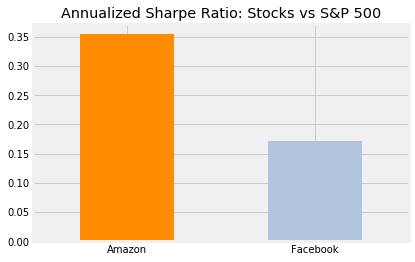

In [15]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(color=['DARKORANGE', "LIGHTSTEELBLUE"], title='Annualized Sharpe Ratio: Stocks vs S&P 500', rot=0)
plt.show()

<strong>Comment:</strong><font color="blue"> Amazon has a Sharpe Ratio 2x higher than Facebook.</font>

# Summary

<strong>Comment:</strong><font color="blue"> The mean price for Amazon is nearly 7x higher than Facebook</font>

<strong>Comment:</strong><font color="blue"> The daily prices for each investment is higher at the end of this reporting period than the initial price.</font>

<strong>Comment:</strong><font color="blue"> The daily mean return is higher for Amazon than Facebook.</font>

<strong>Comment:</strong><font color="blue"> Amazon's mean excess return is higher than Facebook excess return.</font>

<strong>Comment:</strong><font color="blue"> Facebook appears to have a smaller standard devision of the return difference than Amazon.</font>

<strong>Comment:</strong><font color="blue"> Amazon has a Sharpe Ratio 2x higher than Facebook.</font>

# <strong><font color="red">Conclusion</font></strong>

During this reporting period, Amazon's Sharpe Ratio suggest that when comparing the risk and return between these two oppotunities, Amazon provided twice as much return at the same unit risk as Facebook, making it a more attractive investment.<br><br>
<em>In short</em>, the aim of this post was to highlight how Python can be used to calculate the Sharpe Ratio, and do so comparing two stock investments.  This ratio is typically used when comparing portfolios, and the values used originate from different sources, but this example highlights the process, and the interpretation, which would remain the same.